<a href="https://colab.research.google.com/github/Thaizalu/Data_Science/blob/main/%5BRio_de_Janeiro%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Rio de Janeiro*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-04-26/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://www.dropbox.com/s/33gfbmmc09b2olm/listings.csv?dl=1) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Thaizalu/data_science/main/listings.csv')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews no último ano
* `license` - 	essa coluna não tem nenhum valor válido

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...,68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,1357.0,5,311,2023-12-22,1.90,1,269,29,NaN
1,216461,Rental unit in Rio de Janeiro · 1 bedroom · 1 ...,1154263,"Zeilma , Da",NaN,Flamengo,-22.93990,-43.17676,Private room,734.0,1,0,NaN,NaN,1,365,0,NaN
2,326205,Condo in Rio de Janeiro · ★4.57 · 1 bedroom · ...,1603206,Bob,NaN,Copacabana,-22.96825,-43.18237,Entire home/apt,366.0,3,152,2023-11-21,1.07,5,293,14,NaN
3,25026,Rental unit in Rio de Janeiro · ★4.72 · 1 bedr...,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,865.0,2,275,2023-12-03,1.67,1,228,29,NaN
4,326575,Rental unit in Rio de Janeiro · ★4.81 · 2 bedr...,1668565,Maria José,NaN,Copacabana,-22.97696,-43.18933,Entire home/apt,368.0,4,227,2023-11-21,1.58,1,245,12,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa com mais entradas e mais variáveis (listings.csv.gz).

In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\ {}'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 36008
Variáveis:\ 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

Esse dataset resumido possui 36008 entradas e 18 variáveis.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` e `license` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 29% das linhas.
* A variável `price` tem quase 5% de valores nulos
* A variável `host_name` não tem nem 1% dos valores nulos.

In [4]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.286103
last_review                       0.286103
price                             0.049184
host_name                         0.000250
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
name                              0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
host_id                           0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma.

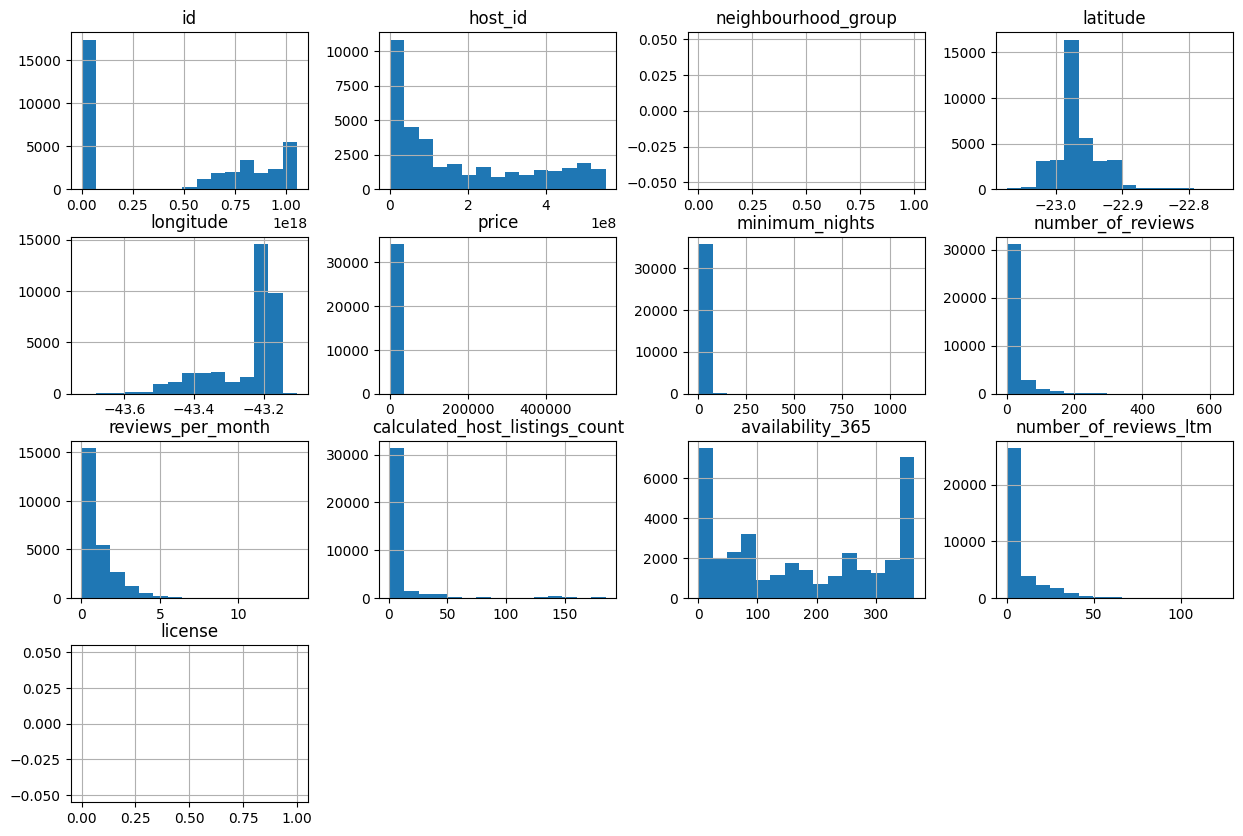

In [5]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

#### **Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [6]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,34237.000000,36008.000000,36008.000000,25706.000000,36008.000000,36008.000000,36008.000000
mean,1211.719572,4.419351,19.545545,1.046277,9.493224,172.418907,7.117307
std,5790.937363,22.738877,40.600380,1.157816,25.677082,135.553905,11.662121
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,361.000000,1.000000,0.000000,0.200000,1.000000,43.000000,0.000000
50%,660.000000,2.000000,4.000000,0.670000,2.000000,160.000000,2.000000
75%,1114.000000,3.000000,20.000000,1.500000,5.000000,316.000000,9.000000
max,552637.000000,1125.000000,638.000000,13.750000,185.000000,365.000000,124.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 1114, porém seu valor máximo é 552637.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

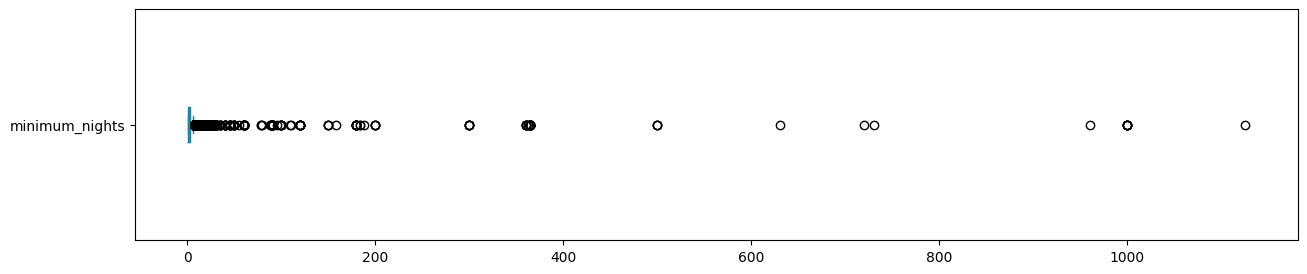

minimum_nights: valores acima de 30:
250 entradas
0.6943%


In [7]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

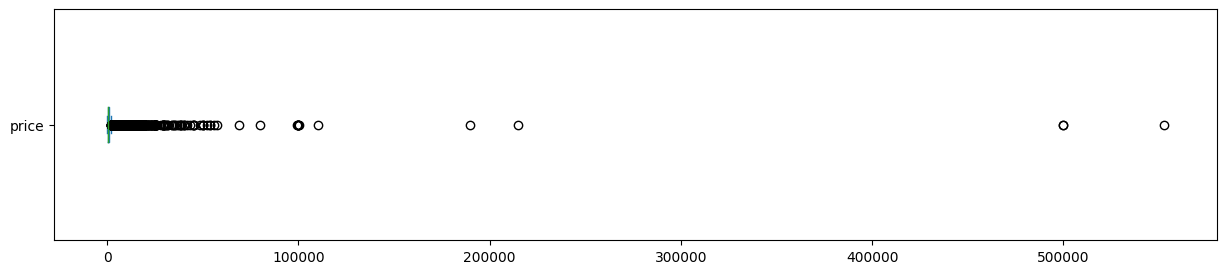


price: valores acima de 7000
545 entradas
1.5136%


In [8]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 7000 para price
print("\nprice: valores acima de 7000")
print("{} entradas".format(len(df[df.price > 7000])))
print("{:.4f}%".format((len(df[df.price > 7000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

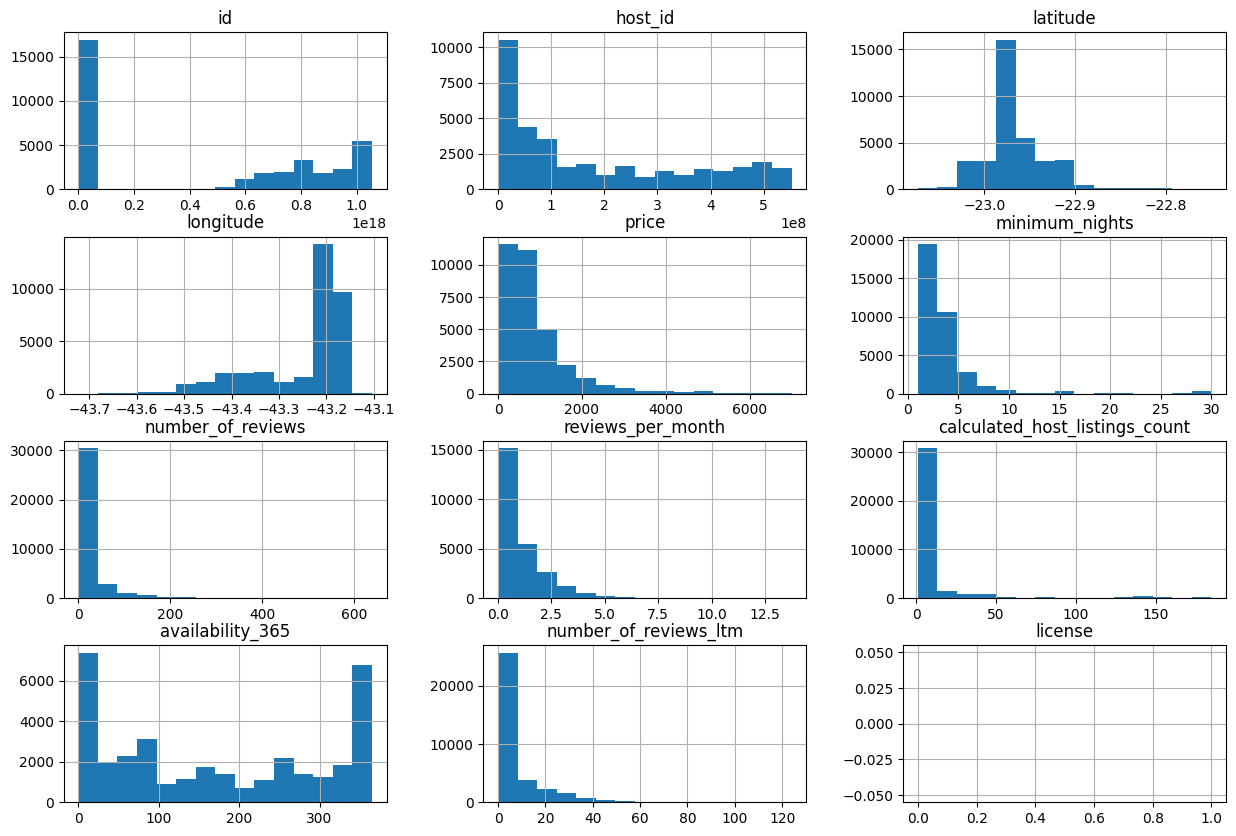

In [9]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 7000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [10]:
# ver a média da coluna `price``
print('Média do aluguel com outlier: {} reais'.format(df.price.mean().round(2)))
print('Média do aluguel sem outlier: {} reais'.format(df_clean.price.mean().round(2)))

Média do aluguel com outlier: 1211.72 reais
Média do aluguel sem outlier: 911.71 reais


### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [11]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.057004,-0.045477,-0.046518,0.162399,0.052452,-0.061143
minimum_nights,0.057004,1.000000,-0.065696,-0.156865,-0.039314,-0.028486,-0.129501
number_of_reviews,-0.045477,-0.065696,1.000000,0.448280,-0.025012,-0.136174,0.710821
reviews_per_month,-0.046518,-0.156865,0.448280,1.000000,0.005518,-0.160439,0.753993
calculated_host_listings_count,0.162399,-0.039314,-0.025012,0.005518,1.000000,0.074366,0.003514
availability_365,0.052452,-0.028486,-0.136174,-0.160439,0.074366,1.000000,-0.168019
number_of_reviews_ltm,-0.061143,-0.129501,0.710821,0.753993,0.003514,-0.168019,1.000000


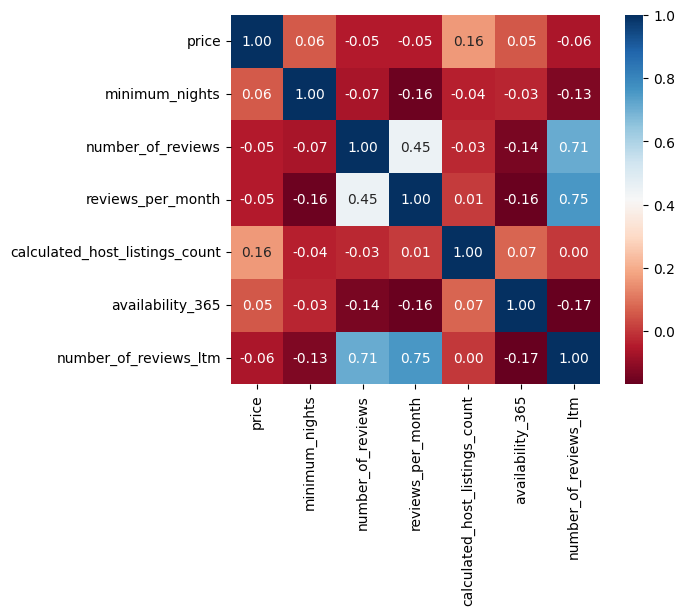

In [12]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [13]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

room_type
Entire home/apt    27773
Private room        6831
Shared room          584
Hotel room            38
Name: count, dtype: int64

In [14]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

room_type
Entire home/apt    78.842332
Private room       19.391926
Shared room         1.657866
Hotel room          0.107875
Name: count, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [15]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Joá                  2991.954023
Jacarezinho          1949.000000
Anchieta             1846.666667
Ipanema              1407.901061
São Conrado          1394.210863
Itanhangá            1369.873333
Leblon               1328.385670
Caju                 1299.000000
Alto da Boa Vista    1296.837838
Lagoa                1224.795181
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

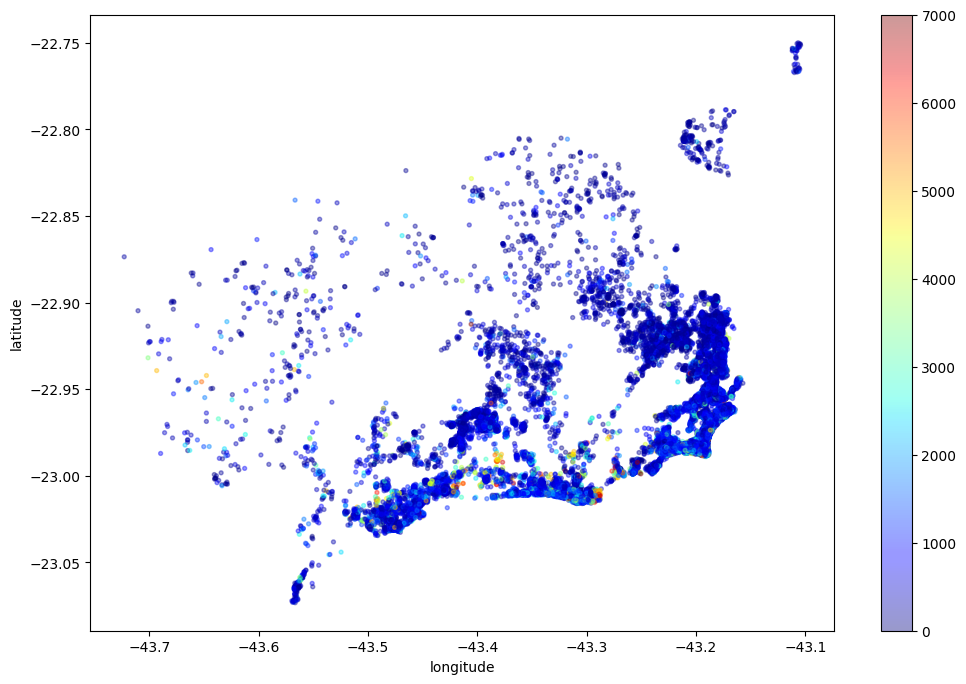

In [16]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [17]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean().round(2)

3.16

## **Conclusões**


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com mais atributos disponíveis.